<a href="https://colab.research.google.com/github/nickname8888/Quaternions-LPI/blob/main/rotate-3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os
import cv2
import numpy as np
from math import pi
import matplotlib.pyplot as plt

In [2]:
os.chdir('/content/drive/MyDrive/datasets/models/rotate-3d')

In [3]:
img = cv2.imread('pic11.jpg')

In [4]:
# img = cv2.resize(img, shape)
h = img.shape[0]
w = img.shape[1]

In [31]:
theta = 0
phi = 60
gamma = 0
dx = -5
dy = 0
dz = 0
phi = phi * pi / 180.0

In [37]:
#getting focal length on z axis
d = np.sqrt(h**2 + w**2)
f = d / (2 * np.sin(gamma) if np.sin(gamma) != 0 else 1)
dz = f

In [33]:
#getting projection matrix

# Projection 2D -> 3D matrix
A1 = np.array([
                [1, 0, -w/2],
                [0, 1, -h/2],
                [0, 0, 1],
                [0, 0, 1]
              ])

# Rotation matrices around the X, Y, and Z axis
RX = np.array([ [1, 0, 0, 0],
                [0, np.cos(theta), -np.sin(theta), 0],
                [0, np.sin(theta), np.cos(theta), 0],
                [0, 0, 0, 1]
               ])

RY = np.array([ [np.cos(phi), 0, -np.sin(phi), 0],
                [0, 1, 0, 0],
                [np.sin(phi), 0, np.cos(phi), 0],
                [0, 0, 0, 1]
               ])

RZ = np.array([ [np.cos(gamma), -np.sin(gamma), 0, 0],
                [np.sin(gamma), np.cos(gamma), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]
               ])

# Composed rotation matrix with (RX, RY, RZ)
R = np.dot(np.dot(RX, RY), RZ)

# Translation matrix
T = np.array([  [1, 0, 0, dx],
                [0, 1, 0, dy],
                [0, 0, 1, dz],
                [0, 0, 0, 1]])

# Projection 3D -> 2D matrix
A2 = np.array([ [f, 0, w/2, 0],
                [0, f, h/2, 0],
                [0, 0, 1, 0]])

# Final transformation matrix
matrix = np.dot(A2, np.dot(T, np.dot(R, A1)))

rotated_img = cv2.warpPerspective(img, matrix, (w, h))

In [34]:
rotated_img = cv2.flip(rotated_img, 1)

In [35]:
cv2.imwrite('pic11rot-60.jpg', rotated_img)

True

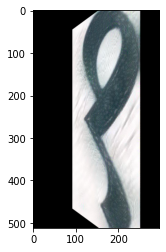

In [39]:
plt.imshow(np.squeeze(rotated_img))